In [1]:
#TITLE: JUNE22ND ML STANDARD
#MODEL OUTPUT: PROBABILITY TEAM WILL WIN GAME (OUTRIGHT/MONEYLINE)

In [3]:
#A lot of this code is going to be from recycled scripts we wrote before 2022 season.
#However, we are utilizing newer, more complete data.
#The models will be enhanced as well.
#Basically just an overall improvement on the methodolgy side

#But the structure of the overall script should remain similar.

In [2]:
#BASING THE CODE OFF OF JANUARY 11TH 2023 ML

In [4]:
#Master Prediction Note Book:
#Import Required Starting Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pylab
import scipy.stats as stats
import random
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
#Import Data - See R scripts (Directly in NCAA folder) for information concerning data
data = pd.read_csv("C:/Users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Ncaa/cfb_data/cfb_new/jan21/June2023/final_data5.csv")

In [6]:
#Check data
data.head()

,away_team.y,season,home_team.x,week.x,game_id,spread,home_win_prob,away_win_prob,home_score,conf.y,...,pass_usage.y,rush_usage.y,utility.x,utility.y,utility_max.x,optimal_X.x,optimal_Y.x,utility_max.y,optimal_X.y,optimal_Y.y
0,Air Force,2015,San Diego State,14,400852675,-3.5,0.595,0.405,27,Mountain West,...,16.724739,83.275261,2237.570308,-21939.426237,2642.762458,74,26,-17927.294430,45,55
1,Air Force,2015,Navy,5,400764876,-6.0,0.660,0.340,33,Mountain West,...,12.857143,87.142857,1694.920428,-16203.305803,1889.282835,24,76,-11436.085819,50,50
2,Air Force,2015,Hawai'i,9,400787271,7.5,0.302,0.698,7,Mountain West,...,14.960630,85.039370,2105.770642,-16263.422908,2338.783298,75,25,-13118.119645,45,55
3,Air Force,2015,New Mexico,13,400787292,10.5,0.234,0.766,47,Mountain West,...,15.861214,84.138786,1354.627887,-13323.303116,2098.409062,76,24,-11084.614083,43,57
4,Air Force,2015,Boise State,12,400790881,-14.5,0.841,0.159,30,Mountain West,...,15.196744,84.803256,3147.095448,-24956.712712,3546.437165,75,25,-20269.047693,43,57


In [7]:
#Clear some not-needed variables
data2 = data
data2.drop(["game_id","conf.y","week.x", "sp_spread.y"], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)

In [8]:
#Check data
data2.head()

,away_team.y,season,home_team.x,spread,home_win_prob,away_win_prob,home_score,away_score,over_under,time_of_poss_total.x,pass_comps.x,pass_atts.x,net_pass_yds.x,pass_TDs.x,interceptions.x,rush_atts.x,rush_yds.x,rush_TDs.x,total_yds.x,fumbles_lost.x,turnovers.x,first_downs.x,third_downs.x,third_down_convs.x,fourth_down_convs.x,fourth_downs.x,penalties.x,penalty_yds.x,kick_returns.x,kick_return_yds.x,kick_return_TDs.x,punt_returns.x,punt_return_yds.x,punt_return_TDs.x,passes_intercepted.x,passes_intercepted_yds.x,passes_intercepted_TDs.x,total_ppa.x,total_passing_ppa.x,total_receiving_ppa.x,total_rushing_ppa.x,percent_ppa.x,percent_passing_ppa.x,percent_receiving_ppa.x,percent_rushing_ppa.x,usage.x,passing_usage.x,receiving_usage.x,rushing_usage.x,talent.x,srs.x,sp_overall.x,sp_offense.x,sp_defense.x,PY_season.x,PY_games.x,PY_time_of_poss_total.x,PY_pass_comps.x,PY_pass_atts.x,PY_net_pass_yds.x,PY_pass_TDs.x,PY_interceptions.x,PY_rush_atts.x,PY_rush_yds.x,PY_rush_TDs.x,PY_total_yds.x,PY_fumbles_lost.x,PY_turnovers.x,PY_first_downs.x,PY_third_downs.x,PY_third_down_convs.x,PY_fourth_down_convs.x,PY_fourth_downs.x,PY_penalties.x,PY_penalty_yds.x,PY_kick_returns.x,PY_kick_return_yds.x,PY_kick_return_TDs.x,PY_punt_returns.x,PY_punt_return_yds.x,PY_punt_return_TDs.x,PY_passes_intercepted.x,PY_passes_intercepted_yds.x,PY_passes_intercepted_TDs.x,PY_year.x,PY_rating.x,PY_ranking.x,PY_offense_ranking.x,PY_offense_rating.x,PY_defense_ranking.x,PY_defense_rating.x,time_of_poss_total.y,pass_comps.y,pass_atts.y,net_pass_yds.y,pass_TDs.y,interceptions.y,rush_atts.y,rush_yds.y,rush_TDs.y,total_yds.y,fumbles_lost.y,turnovers.y,first_downs.y,third_downs.y,third_down_convs.y,fourth_down_convs.y,fourth_downs.y,penalties.y,penalty_yds.y,kick_returns.y,kick_return_yds.y,kick_return_TDs.y,punt_returns.y,punt_return_yds.y,punt_return_TDs.y,total_ppa.y,total_passing_ppa.y,total_receiving_ppa.y,total_rushing_ppa.y,percent_ppa.y,percent_passing_ppa.y,percent_receiving_ppa.y,percent_rushing_ppa.y,usage.y,passing_usage.y,receiving_usage.y,rushing_usage.y,talent.y,srs.y,sp_overall.y,sp_offense.y,sp_defense.y,PY_season.y,PY_games.y,PY_time_of_poss_total.y,PY_pass_comps.y,PY_pass_atts.y,PY_net_pass_yds.y,PY_pass_TDs.y,PY_interceptions.y,PY_rush_atts.y,PY_rush_yds.y,PY_rush_TDs.y,PY_total_yds.y,PY_fumbles_lost.y,PY_turnovers.y,PY_first_downs.y,PY_third_downs.y,PY_third_down_convs.y,PY_fourth_down_convs.y,PY_fourth_downs.y,PY_penalties.y,PY_penalty_yds.y,PY_kick_returns.y,PY_kick_return_yds.y,PY_kick_return_TDs.y,PY_punt_returns.y,PY_punt_return_yds.y,PY_punt_return_TDs.y,PY_passes_intercepted.y,PY_passes_intercepted_yds.y,PY_passes_intercepted_TDs.y,PY_year.y,PY_rating.y,PY_ranking.y,PY_offense_ranking.y,PY_offense_rating.y,PY_defense_ranking.y,PY_defense_rating.y,rec_DB_recruiting.x,rec_DL_recruiting.x,rec_LB_recruiting.x,rec_OL_recruiting.x,rec_QB_recruiting.x,rec_WR_recruiting.x,rec_RB_recruiting.x,rec_DB_recruiting.y,rec_DL_recruiting.y,rec_LB_recruiting.y,rec_OL_recruiting.y,rec_QB_recruiting.y,rec_WR_recruiting.y,rec_RB_recruiting.y,td_ratio.x,td_ratio.y,to_ratio.x,to_ratio.y,third_down_conv_pct.x,third_down_conv_pct.y,aggressiveness.x,aggressiveness.y,sp_spread.x,implied_pts.y,implied_pts.x,recQBper.x,recWRper.x,recOLper.x,recRBper.x,perQBtotal.x,perWRtotal.x,perOLtotal.x,perRBtotal.x,recDLper.y,recLBper.y,recDBper.y,perDLtotal.y,perLBtotal.y,perDBtotal.y,passing_edge.x,rushing_edge.x,pass_usage.x,rush_usage.x,recQBper.y,recWRper.y,recOLper.y,recRBper.y,perQBtotal.y,perWRtotal.y,perOLtotal.y,perRBtotal.y,recDLper.x,recLBper.x,recDBper.x,perDLtotal.x,perLBtotal.x,perDBtotal.x,passing_edge.y,rushing_edge.y,pass_usage.y,rush_usage.y,utility.x,utility.y,utility_max.x,optimal_X.x,optimal_Y.x,utility_max.y,optimal_X.y,optimal_Y.y
0,Air Force,2015,San Diego State,-3.5,0.595,0.405,27,24,46.5,23450,123,226,1656,14,3,577,2826,28,4482,8,11,221,176,71,6,8,80,743,28,781,2,23,256,1,20,251,3,188.8,-10.0,82.4,116.4,0.682,-0.503,0.592,0.990,0.620,0.121,0.687,0.965,494.7

In [9]:
#Example of calculating Utility Grade
data2["utility.x"]-data2["utility_max.x"] #All negative, but larger negatives (closer to 0) indicate better allocation

0       -405.192151
1       -194.362407
2       -233.012656
3       -743.781175
4       -399.341717
           ...     
6067   -2319.975410
6068    -204.576663
6069     -97.118347
6070     -97.118347
6071     -48.399574
Length: 6072, dtype: float64

In [10]:
#Creat additional utility variables & remove
data2["utility_grade.x"] = data2["utility.x"]-data2["utility_max.x"]
data2["utility_grade.y"] = data2["utility.y"]-data2["utility_max.y"]


#Create outcome
data2["home_win.x"] = np.where(data2["home_score"] > data2["away_score"], 1, 0)

In [11]:
#Shuffle the dataset
data2 = data2.sample(frac=1)
#Dropping NA values/Duplicates & Name columns
data2 = data2.dropna()
data2 = data2.drop_duplicates()
#Shuffle the dataset
data2 = data2.sample(frac=1)

In [12]:
#Split the data
random.seed(5414)
train, test = train_test_split(data2, test_size=0.15)
#Train - 4517 
#Test - 798

In [13]:
print("Training Obs:", train.shape[0], "Testing Obs:", test.shape[0])

Training Obs: 4517 Testing Obs: 798


In [14]:
#Create reference columns so we can preserve the data for evaluations at the end:
#Reference Columns for each set
reference_columns_train = train.iloc[:, 0:8]
reference_columns_test = test.iloc[:, 0:8]

In [15]:
#View the training Data
train

,away_team.y,season,home_team.x,spread,home_win_prob,away_win_prob,home_score,away_score,over_under,time_of_poss_total.x,pass_comps.x,pass_atts.x,net_pass_yds.x,pass_TDs.x,interceptions.x,rush_atts.x,rush_yds.x,rush_TDs.x,total_yds.x,fumbles_lost.x,turnovers.x,first_downs.x,third_downs.x,third_down_convs.x,fourth_down_convs.x,fourth_downs.x,penalties.x,penalty_yds.x,kick_returns.x,kick_return_yds.x,kick_return_TDs.x,punt_returns.x,punt_return_yds.x,punt_return_TDs.x,passes_intercepted.x,passes_intercepted_yds.x,passes_intercepted_TDs.x,total_ppa.x,total_passing_ppa.x,total_receiving_ppa.x,total_rushing_ppa.x,percent_ppa.x,percent_passing_ppa.x,percent_receiving_ppa.x,percent_rushing_ppa.x,usage.x,passing_usage.x,receiving_usage.x,rushing_usage.x,talent.x,srs.x,sp_overall.x,sp_offense.x,sp_defense.x,PY_season.x,PY_games.x,PY_time_of_poss_total.x,PY_pass_comps.x,PY_pass_atts.x,PY_net_pass_yds.x,PY_pass_TDs.x,PY_interceptions.x,PY_rush_atts.x,PY_rush_yds.x,PY_rush_TDs.x,PY_total_yds.x,PY_fumbles_lost.x,PY_turnovers.x,PY_first_downs.x,PY_third_downs.x,PY_third_down_convs.x,PY_fourth_down_convs.x,PY_fourth_downs.x,PY_penalties.x,PY_penalty_yds.x,PY_kick_returns.x,PY_kick_return_yds.x,PY_kick_return_TDs.x,PY_punt_returns.x,PY_punt_return_yds.x,PY_punt_return_TDs.x,PY_passes_intercepted.x,PY_passes_intercepted_yds.x,PY_passes_intercepted_TDs.x,PY_year.x,PY_rating.x,PY_ranking.x,PY_offense_ranking.x,PY_offense_rating.x,PY_defense_ranking.x,PY_defense_rating.x,time_of_poss_total.y,pass_comps.y,pass_atts.y,net_pass_yds.y,pass_TDs.y,interceptions.y,rush_atts.y,rush_yds.y,rush_TDs.y,total_yds.y,fumbles_lost.y,turnovers.y,first_downs.y,third_downs.y,third_down_convs.y,fourth_down_convs.y,fourth_downs.y,penalties.y,penalty_yds.y,kick_returns.y,kick_return_yds.y,kick_return_TDs.y,punt_returns.y,punt_return_yds.y,punt_return_TDs.y,total_ppa.y,total_passing_ppa.y,total_receiving_ppa.y,total_rushing_ppa.y,percent_ppa.y,percent_passing_ppa.y,percent_receiving_ppa.y,percent_rushing_ppa.y,usage.y,passing_usage.y,receiving_usage.y,rushing_usage.y,talent.y,srs.y,sp_overall.y,sp_offense.y,sp_defense.y,PY_season.y,PY_games.y,PY_time_of_poss_total.y,PY_pass_comps.y,PY_pass_atts.y,PY_net_pass_yds.y,PY_pass_TDs.y,PY_interceptions.y,PY_rush_atts.y,PY_rush_yds.y,PY_rush_TDs.y,PY_total_yds.y,PY_fumbles_lost.y,PY_turnovers.y,PY_first_downs.y,PY_third_downs.y,PY_third_down_convs.y,PY_fourth_down_convs.y,PY_fourth_downs.y,PY_penalties.y,PY_penalty_yds.y,PY_kick_returns.y,PY_kick_return_yds.y,PY_kick_return_TDs.y,PY_punt_returns.y,PY_punt_return_yds.y,PY_punt_return_TDs.y,PY_passes_intercepted.y,PY_passes_intercepted_yds.y,PY_passes_intercepted_TDs.y,PY_year.y,PY_rating.y,PY_ranking.y,PY_offense_ranking.y,PY_offense_rating.y,PY_defense_ranking.y,PY_defense_rating.y,rec_DB_recruiting.x,rec_DL_recruiting.x,rec_LB_recruiting.x,rec_OL_recruiting.x,rec_QB_recruiting.x,rec_WR_recruiting.x,rec_RB_recruiting.x,rec_DB_recruiting.y,rec_DL_recruiting.y,rec_LB_recruiting.y,rec_OL_recruiting.y,rec_QB_recruiting.y,rec_WR_recruiting.y,rec_RB_recruiting.y,td_ratio.x,td_ratio.y,to_ratio.x,to_ratio.y,third_down_conv_pct.x,third_down_conv_pct.y,aggressiveness.x,aggressiveness.y,sp_spread.x,implied_pts.y,implied_pts.x,recQBper.x,recWRper.x,recOLper.x,recRBper.x,perQBtotal.x,perWRtotal.x,perOLtotal.x,perRBtotal.x,recDLper.y,recLBper.y,recDBper.y,perDLtotal.y,perLBtotal.y,perDBtotal.y,passing_edge.x,rushing_edge.x,pass_usage.x,rush_usage.x,recQBper.y,recWRper.y,recOLper.y,recRBper.y,perQBtotal.y,perWRtotal.y,perOLtotal.y,perRBtotal.y,recDLper.x,recLBper.x,recDBper.x,perDLtotal.x,perLBtotal.x,perDBtotal.x,passing_edge.y,rushing_edge.y,pass_usage.y,rush_usage.y,utility.x,utility.y,utility_max.x,optimal_X.x,optimal_Y.x,utility_max.y,optimal_X.y,optimal_Y.y,utility_grade.x,utility_grade.y,home_win.x
801,California,2016,San Diego State,-7.0,0.685,0.315,45,40,59.5,2069,17,26,291,2,0,41,170,2,461,0,0,19,15,5,0,0,9,70,1,9,0,3,16,0,1,0,0,198.7,27.6,95.7,75.5,0.568,0.326,0.664,0.623,0.538,0.1

In [16]:
#Drop the reference columns: Keeping SRS included in the data for now - might modify later on
train.drop(["away_team.y", "season", "home_team.x", "home_score", "home_score", "away_score"], axis = 1, inplace = True)
test.drop(["away_team.y", "season", "home_team.x", "home_score", "home_score", "away_score"], axis = 1, inplace = True)

In [17]:
#look at the data
pd.set_option('display.max_rows', None)
train.head(n=10)

,spread,home_win_prob,away_win_prob,over_under,time_of_poss_total.x,pass_comps.x,pass_atts.x,net_pass_yds.x,pass_TDs.x,interceptions.x,rush_atts.x,rush_yds.x,rush_TDs.x,total_yds.x,fumbles_lost.x,turnovers.x,first_downs.x,third_downs.x,third_down_convs.x,fourth_down_convs.x,fourth_downs.x,penalties.x,penalty_yds.x,kick_returns.x,kick_return_yds.x,kick_return_TDs.x,punt_returns.x,punt_return_yds.x,punt_return_TDs.x,passes_intercepted.x,passes_intercepted_yds.x,passes_intercepted_TDs.x,total_ppa.x,total_passing_ppa.x,total_receiving_ppa.x,total_rushing_ppa.x,percent_ppa.x,percent_passing_ppa.x,percent_receiving_ppa.x,percent_rushing_ppa.x,usage.x,passing_usage.x,receiving_usage.x,rushing_usage.x,talent.x,srs.x,sp_overall.x,sp_offense.x,sp_defense.x,PY_season.x,PY_games.x,PY_time_of_poss_total.x,PY_pass_comps.x,PY_pass_atts.x,PY_net_pass_yds.x,PY_pass_TDs.x,PY_interceptions.x,PY_rush_atts.x,PY_rush_yds.x,PY_rush_TDs.x,PY_total_yds.x,PY_fumbles_lost.x,PY_turnovers.x,PY_first_downs.x,PY_third_downs.x,PY_third_down_convs.x,PY_fourth_down_convs.x,PY_fourth_downs.x,PY_penalties.x,PY_penalty_yds.x,PY_kick_returns.x,PY_kick_return_yds.x,PY_kick_return_TDs.x,PY_punt_returns.x,PY_punt_return_yds.x,PY_punt_return_TDs.x,PY_passes_intercepted.x,PY_passes_intercepted_yds.x,PY_passes_intercepted_TDs.x,PY_year.x,PY_rating.x,PY_ranking.x,PY_offense_ranking.x,PY_offense_rating.x,PY_defense_ranking.x,PY_defense_rating.x,time_of_poss_total.y,pass_comps.y,pass_atts.y,net_pass_yds.y,pass_TDs.y,interceptions.y,rush_atts.y,rush_yds.y,rush_TDs.y,total_yds.y,fumbles_lost.y,turnovers.y,first_downs.y,third_downs.y,third_down_convs.y,fourth_down_convs.y,fourth_downs.y,penalties.y,penalty_yds.y,kick_returns.y,kick_return_yds.y,kick_return_TDs.y,punt_returns.y,punt_return_yds.y,punt_return_TDs.y,total_ppa.y,total_passing_ppa.y,total_receiving_ppa.y,total_rushing_ppa.y,percent_ppa.y,percent_passing_ppa.y,percent_receiving_ppa.y,percent_rushing_ppa.y,usage.y,passing_usage.y,receiving_usage.y,rushing_usage.y,talent.y,srs.y,sp_overall.y,sp_offense.y,sp_defense.y,PY_season.y,PY_games.y,PY_time_of_poss_total.y,PY_pass_comps.y,PY_pass_atts.y,PY_net_pass_yds.y,PY_pass_TDs.y,PY_interceptions.y,PY_rush_atts.y,PY_rush_yds.y,PY_rush_TDs.y,PY_total_yds.y,PY_fumbles_lost.y,PY_turnovers.y,PY_first_downs.y,PY_third_downs.y,PY_third_down_convs.y,PY_fourth_down_convs.y,PY_fourth_downs.y,PY_penalties.y,PY_penalty_yds.y,PY_kick_returns.y,PY_kick_return_yds.y,PY_kick_return_TDs.y,PY_punt_returns.y,PY_punt_return_yds.y,PY_punt_return_TDs.y,PY_passes_intercepted.y,PY_passes_intercepted_yds.y,PY_passes_intercepted_TDs.y,PY_year.y,PY_rating.y,PY_ranking.y,PY_offense_ranking.y,PY_offense_rating.y,PY_defense_ranking.y,PY_defense_rating.y,rec_DB_recruiting.x,rec_DL_recruiting.x,rec_LB_recruiting.x,rec_OL_recruiting.x,rec_QB_recruiting.x,rec_WR_recruiting.x,rec_RB_recruiting.x,rec_DB_recruiting.y,rec_DL_recruiting.y,rec_LB_recruiting.y,rec_OL_recruiting.y,rec_QB_recruiting.y,rec_WR_recruiting.y,rec_RB_recruiting.y,td_ratio.x,td_ratio.y,to_ratio.x,to_ratio.y,third_down_conv_pct.x,third_down_conv_pct.y,aggressiveness.x,aggressiveness.y,sp_spread.x,implied_pts.y,implied_pts.x,recQBper.x,recWRper.x,recOLper.x,recRBper.x,perQBtotal.x,perWRtotal.x,perOLtotal.x,perRBtotal.x,recDLper.y,recLBper.y,recDBper.y,perDLtotal.y,perLBtotal.y,perDBtotal.y,passing_edge.x,rushing_edge.x,pass_usage.x,rush_usage.x,recQBper.y,recWRper.y,recOLper.y,recRBper.y,perQBtotal.y,perWRtotal.y,perOLtotal.y,perRBtotal.y,recDLper.x,recLBper.x,recDBper.x,perDLtotal.x,perLBtotal.x,perDBtotal.x,passing_edge.y,rushing_edge.y,pass_usage.y,rush_usage.y,utility.x,utility.y,utility_max.x,optimal_X.x,optimal_Y.x,utility_max.y,optimal_X.y,optimal_Y.y,utility_grade.x,utility_grade.y,home_win.x
801,-7.0,0.685,0.315,59.5,2069,17,26,291,2,0,41,170,2,461,0,0,19,15,5,0,0,9,70,1,9,0,3,16,0,1,0,0,198.7,27.6,95.7,75.5,0.568,0.326,0.664,0.623,0.538,0.198,0.705,0.625,482.31,5.4,11.4,32.0,22.5,2015,13,25326,132,240,1859,15,3,623,3059,30,4918,9

In [22]:
#Variable reduction


#Define the target and predictors
labels = np.array(train['home_win.x']) #Outcome Column
features = train.drop(['home_win.x'], axis = 1) #All other Columns

#Store a list of the predictors
feature_list = list(features.columns)
features = np.array(features)

#Define the randomforest model (for variable importance)
from sklearn.ensemble import RandomForestRegressor


#Criterion Notes:
    
    #Squared Error - MSE, variance reduction as feature selection criterion minimizes L2 loss
            #return (proxy_impurity_left / self.weighted_n_left) + (proxy_impurity_right / self.weighted_n_right)
            #Measures reduction in impurity
            #Minimizing the squared error emphasizes larger errors
            
    #Friedmans MSE - MSE with Freidmans Improvement score for potential splits
            #diff = w_r * total_left_sum - w_l * total_rigth_sum
            #return diff * diff / (self.weighted_n_left * self.weighted_n_right)
#Freidman MSE:
#It is not shown in the docs because we think that it should not be used in trees or forests.
#It’s main purpose is for gradient boosting which depends on the tree module.


    #Absolute Error - MSE, variance reduction as feature selection criterion minimizes L1 loss
            #Minimizing the absolute error treats all errors equally and does not amplify the impact of outliers
    
    
    #Poisson - Measures reduction in poisson deviance to find splits - describes the number of events that occur within a fixed interval of time or space
        #In Poisson regression, the response variable is assumed to follow a Poisson distribution
        # So it is not poisson - doesnt really fit what we are looking for

        
    #Squared error loss is commonly used when the emphasis is placed on reducing larger errors
    #and when outliers have a significant impact. Absolute error loss, on the other hand,
    #is often preferred when a more robust and resistant measure of error is desired, as it is less affected by outliers.

    #Since we are doing a binary classification, I would argue that Absolute error is more appropriate. only because for a binary model, the predicted value it either right or wrong, even if you are averaging predictions - 
        #For 2 reasons
        #1. Its a binary model. So even IF we were only considering 0/1, the magnitude shouldnt carry more weight
            #at the end of the day a 0.51 is just as wrong as a 0.99
        #2. Even if we are going to use thresholds, the outliers are going be less frequent so to base the entire loss function on it for all obs would not be correct

        
        
        
#rf_mod = RandomForestRegressor(n_estimators = 1000, criterion='poisson',
#                                max_depth = 14, oob_score=True, max_samples=0.95)

#rf_mod = RandomForestRegressor(n_estimators = 1000, criterion='squared_error',
#                                max_depth = 14, oob_score=True, max_samples=0.95)

rf_mod = RandomForestRegressor(n_estimators = 1000, criterion='squared_error',
                                max_depth = 14, oob_score=True, max_samples=0.95)

import random
random.seed(2112)

#Train the model
rf_mod.fit(features, labels)


#Pull importance list from the rf object
importances = list(rf_mod.feature_importances_)


#List variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

#Order by importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#Define the new list
varimp = pd.DataFrame(feature_importances, columns=['Variable','Importance'])

In [23]:
#Viewing RF importances
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
varimp

,Variable,Importance
0,spread,0.1062
1,home_win_prob,0.0985
2,away_win_prob,0.0943
3,sp_spread.x,0.0572
4,srs.x,0.0301
5,srs.y,0.0232
6,sp_defense.y,0.0106
7,sp_defense.x,0.0103
8,sp_overall.x,0.0089
9,sp_overall.y,0.0082


In [24]:
#Permutation Based Feature Importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf_mod, features, labels)


#Extract the importance from the perm_importance object
varimp_perm = pd.DataFrame(perm_importance.importances_mean, columns=['Importance'], index = feature_list)
varimp_perm["Variable"] = (varimp_perm.index)
#Sort the values
varimp_perm.sort_values("Importance", ascending = False)

,Importance,Variable
sp_spread.x,0.238566,sp_spread.x
spread,0.114108,spread
home_win_prob,0.102030,home_win_prob
srs.x,0.101900,srs.x
away_win_prob,0.099687,away_win_prob
srs.y,0.071218,srs.y
sp_defense.y,0.029640,sp_defense.y
sp_defense.x,0.021623,sp_defense.x
sp_overall.y,0.019525,sp_overall.y
sp_overall.x,0.019097,sp_overall.x


In [25]:
#Drop irrelevant features
#Select variables which have an importance above 0.005
varimp_rf_gini = varimp[varimp.Importance >= 0.004]
varimp_rf_gini_features= list(varimp_rf_gini["Variable"])
#print(varimp_rf_gini_features)

#Filter out unimportant variables & sort accordingly
varimp_perm = varimp_perm[varimp_perm.Importance >= 0.004]
varimp_perm.sort_values("Importance", ascending = False)
#Create a list of the selected variables
varimp_rf_perm_features = list(varimp_perm["Variable"])
#print(varimp_rf_perm_features)
varimp_perm.sort_values("Importance", ascending=False)



#Combine the lists & remove the duplicates
selected_vars = list(varimp_rf_gini_features+varimp_rf_perm_features)
selected_vars2 = list()
for item in selected_vars:
    if item not in selected_vars2:
        selected_vars2.append(item)

print(selected_vars2)

['spread', 'home_win_prob', 'away_win_prob', 'sp_spread.x', 'srs.x', 'srs.y', 'sp_defense.y', 'sp_defense.x', 'sp_overall.x', 'sp_overall.y', 'utility_grade.y', 'percent_rushing_ppa.x', 'utility_grade.x', 'aggressiveness.y', 'recRBper.y', 'recDBper.x', 'passes_intercepted_yds.x', 'receiving_usage.x', 'PY_punt_return_yds.y', 'rec_WR_recruiting.x', 'td_ratio.y', 'recOLper.y', 'punt_return_yds.y', 'aggressiveness.x', 'td_ratio.x', 'to_ratio.x', 'percent_passing_ppa.x', 'total_receiving_ppa.y', 'to_ratio.y', 'recQBper.x', 'recWRper.x', 'total_passing_ppa.x', 'PY_punt_return_yds.x', 'PY_net_pass_yds.y', 'PY_passes_intercepted_yds.y', 'rec_RB_recruiting.y', 'implied_pts.y', 'implied_pts.x', 'rushing_edge.y']


In [26]:
#Store selected varaibles:
selected_vars = ['spread', 'home_win_prob', 'away_win_prob', 'sp_spread.x', 'srs.x', 'srs.y', 'sp_defense.y', 'sp_defense.x', 'sp_overall.x', 'sp_overall.y', 'utility_grade.y', 'percent_rushing_ppa.x', 'utility_grade.x', 'aggressiveness.y', 'recRBper.y', 'recDBper.x', 'passes_intercepted_yds.x', 'receiving_usage.x', 'PY_punt_return_yds.y', 'rec_WR_recruiting.x', 'td_ratio.y', 'recOLper.y', 'punt_return_yds.y', 'aggressiveness.x', 'td_ratio.x', 'to_ratio.x', 'percent_passing_ppa.x', 'total_receiving_ppa.y', 'to_ratio.y', 'recQBper.x', 'recWRper.x', 'total_passing_ppa.x', 'PY_punt_return_yds.x', 'PY_net_pass_yds.y', 'PY_passes_intercepted_yds.y', 'rec_RB_recruiting.y', 'implied_pts.y', 'implied_pts.x', 'rushing_edge.y']

In [39]:
#Reduce the dataset(s)
#Keep columns selected from Gini/Perm importance - along with the target

#Train
train2 = pd.DataFrame(train, columns = selected_vars2)
train2["home_win.x"] = train["home_win.x"]
#Test
test2 = pd.DataFrame(test, columns = selected_vars2)
test2["home_win.x"] = test["home_win.x"]

In [40]:
#Turn into float
train2 = train2.astype(float)
test2 = test2.astype(float)

In [41]:
#Dropping outliers
#To verify there are outliers according to the zscore
z = np.abs(stats.zscore(train2))

array([[<AxesSubplot:title={'center':'utility_grade.y'}>]], dtype=object)

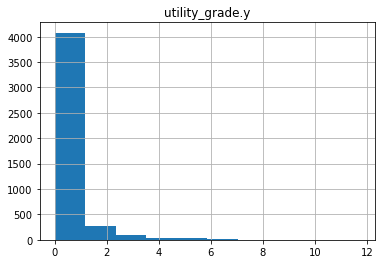

In [42]:
#View some of the distributions:
z.hist("utility_grade.y")

array([[<AxesSubplot:title={'center':'sp_spread.x'}>]], dtype=object)

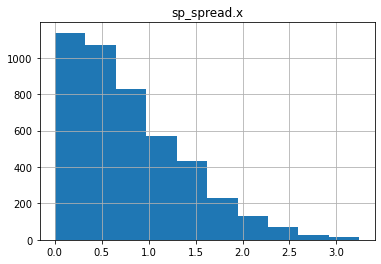

In [43]:
#View some of the distributions:
z.hist("sp_spread.x")

In [44]:
#We can see all the values that fall outside the z score range
train2 = train2[(z<3.25).all(axis=1)]
#Dropped about 200 obs due to having some outliers in the data - dropped 200 - from 1270 to 1070

In [45]:
#Look at shape of data
print("Original Train Shape:", train.shape, "Removed Outliers Train Shape", train2.shape)

Original Train Shape: (4517, 237) Removed Outliers Train Shape (3895, 40)


In [46]:
train.shape

(4517, 237)

In [47]:
train2.shape

(3895, 40)

In [48]:
#Need to define the labels
#Define inputs/target
x_train = train2.drop("home_win.x", axis = 1)
y_train = train2["home_win.x"]

x_test= test2.drop("home_win.x", axis = 1)
y_test = test2["home_win.x"]

In [49]:
#Have to normalize the data before passing to Algorithim

#Pull the training data mean/std/min/max
train_min = x_train.min()
train_max = x_train.max()

#For testing we are doing the same - we just have to be aware of this when we move to production
test_min = x_test.min()
test_max = x_test.max()

In [50]:
#Normalize the train/testing/validation based off the training features
x_train2 = ((x_train - train_min)/(train_max-train_min))+1
x_test2 = ((x_test - test_min)/(test_max-test_min))+1

In [51]:
#Using the log transofmation
x_train2 = pd.DataFrame((np.log(x_train2)))
x_test2 = pd.DataFrame((np.log(x_test2)))

In [52]:
#Need to define the labels
#Define inputs/target
x_train3 = x_train2.values
y_train3 = y_train.values
x_test3 = x_test2.values
y_test3 = y_test.values

In [53]:
#View the normalized data
x_train2.head(n=15)

,spread,home_win_prob,away_win_prob,sp_spread.x,srs.x,srs.y,sp_defense.y,sp_defense.x,sp_overall.x,sp_overall.y,utility_grade.y,percent_rushing_ppa.x,utility_grade.x,aggressiveness.y,recRBper.y,recDBper.x,passes_intercepted_yds.x,receiving_usage.x,PY_punt_return_yds.y,rec_WR_recruiting.x,td_ratio.y,recOLper.y,punt_return_yds.y,aggressiveness.x,td_ratio.x,to_ratio.x,percent_passing_ppa.x,total_receiving_ppa.y,to_ratio.y,recQBper.x,recWRper.x,total_passing_ppa.x,PY_punt_return_yds.x,PY_net_pass_yds.y,PY_passes_intercepted_yds.y,rec_RB_recruiting.y,implied_pts.y,implied_pts.x,rushing_edge.y
801,0.373204,0.521423,0.274276,0.476483,0.458692,0.427002,0.516618,0.338922,0.486201,0.404478,0.691367,0.374206,0.632328,0.390261,0.423210,0.443656,0.130560,0.523640,0.113944,0.560637,0.492685,0.311437,0.035194,0.000000,0.438958,0.000000,0.359455,0.119105,0.000000,0.332470,0.491790,0.259353,0.444576,0.624980,0.156641,0.442809,0.387183,0.414064,0.490689
3522,0.521483,0.174755,0.592799,0.496159,0.478674,0.568903,0.309740,0.458402,0.439900,0.598576,0.629013,0.399624,0.399225,0.451023,0.465564,0.325541,0.181332,0.540405,0.320020,0.458409,0.527061,0.407572,0.292892,0.157888,0.411635,0.355985,0.388141,0.565874,0.195569,0.388814,0.430080,0.323691,0.143101,0.519126,0.299458,0.529674,0.559616,0.317040,0.645735
2225,0.500054,0.225753,0.557748,0.501987,0.278203,0.460525,0.324846,0.495690,0.261440,0.468523,0.672718,0.388652,0.692504,0.420857,0.248544,0.520583,0.291384,0.592591,0.263690,0.496044,0.324170,0.435190,0.349184,0.263978,0.203698,0.360165,0.345191,0.265991,0.411442,0.207291,0.468144,0.181976,0.334639,0.288064,0.375940,0.244175,0.387183,0.157845,0.480440
3116,0.369097,0.529149,0.264295,0.446223,0.439238,0.314885,0.574326,0.383772,0.346716,0.199190,0.692640,0.188781,0.445548,0.551876,0.322679,0.430353,0.130560,0.521759,0.214485,0.378732,0.302860,0.124380,0.112795,0.163955,0.368753,0.182053,0.387302,0.298201,0.560968,0.205569,0.317728,0.341057,0.308301,0.370005,0.230597,0.218218,0.379776,0.414064,0.392658
2675,0.265108,0.647919,0.084748,0.411315,0.288045,0.336887,0.421926,0.409748,0.337116,0.316839,0.692660,0.382946,0.198301,0.357415,0.484705,0.264011,0.435667,0.135248,0.157225,0.562241,0.302371,0.236523,0.032308,0.355985,0.364338,0.464033,0.382292,0.491335,0.384821,0.521968,0.659826,0.557984,0.287682,0.370608,0.349919,0.599753,0.257335,0.470651,0.310969
1788,0.503657,0.216893,0.564057,0.546502,0.221691,0.385430,0.510411,0.566337,0.182071,0.361103,0.316350,0.418117,0.691358,0.584381,0.465962,0.588847,0.236701,0.454289,0.293056,0.124483,0.463162,0.307370,0.184806,0.252457,0.318071,0.538038,0.398202,0.457867,0.614536,0.124439,0.373772,0.340319,0.546094,0.595467,0.048671,0.354367,0.578078,0.375664,0.498868
6001,0.478155,0.281128,0.516038,0.455905,0.499147,0.567258,0.207250,0.354097,0.404464,0.531324,0.630862,0.393980,0.620263,0.192098,0.396507,0.311062,0.200940,0.387690,0.389534,0.397278,0.302255,0.371161,0.270369,0.382510,0.326817,0.244467,0.388477,0.271953,0.405744,0.393341,0.325622,0.256948,0.224851,0.407427,0.267530,0.442141,0.353409,0.171032,0.400972
4048,0.405465,0.457997,0.350020,0.343306,0.404013,0.381474,0.455374,0.419670,0.373942,0.268264,0.692730,0.353793,0.549799,0.419824,0.357439,0.424696,0.130560,0.409685,0.092563,0.591301,0.351917,0.377104,0.218956,0.071131,0.361713,0.586832,0.337408,0.229774,0.383952,0.287458,0.569877,0.190017,0.250127,0.237055,0.027062,0.371081,0.383486,0.354081,0.388220
3881,0.405465,0.457997,0.350020,0.455397,0.509664,0.490297,0.327840,0.315719,0.466620,0.486872,0.538269,0.345401,0.680409,0.112741,0.379991,0.344039,0.158803,0.365934,0.326260,0.425676,0.449856,0.344039,0.017752,0.505506,0.426096,0.260333,0.351347,0.378408,0.373712,0.293565,0.363013,0.227906,0.241772,0.323262,0.218645,0.388113,0.330242,0.301830,0.410680
4969,0.510826,0.199757,0.575992,0.474991,0.204095,0.302092,0.390134,0.428097,0.216515,0.312519,0.464279,0.361281,0.622200,0.681293,0.344986,0.549500,0.130560,0.553861,0.205752,0.285942,0.535518,0.564509

array([[<AxesSubplot:title={'center':'srs.y'}>]], dtype=object)

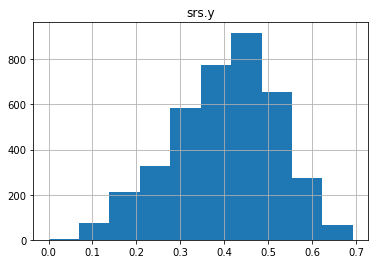

In [56]:
#View the distributions after normalization
x_train2.hist("srs.y")

array([[<AxesSubplot:title={'center':'sp_overall.y'}>]], dtype=object)

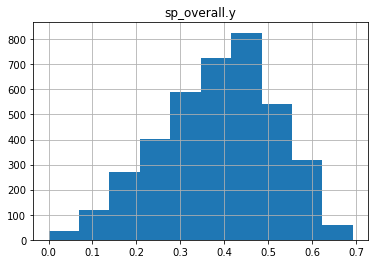

In [55]:
#View the distributions after normalization
x_train2.hist("sp_overall.y")

In [61]:
#Make sure skOpt is installed and ready to go;
try:
    import skopt
    print("scikit-optimize is already installed.")
except ImportError:
    print("scikit-optimize is not installed.")

scikit-optimize is already installed.


In [ ]:
#Model outline:


#GradientBoostingClassifier:
#A boosting algorithm that builds an ensemble of weak decision tree classifiers.

#Gradient Descent Optimization:
#The algorithm uses gradient descent optimization to iteratively minimize a loss function
#by adding new models to the ensemble. Each new model is trained to predict the residuals
#(differences between predicted and actual values) of the previous models, gradually improving the overall prediction.

#Regularization:
#To prevent overfitting, GradientBoostingClassifier incorporates regularization techniques such as
#shrinkage (learning rate) and subsampling (using a subset of the training data for each iteration).
#These techniques help improve generalization and control the complexity of the model.

#Hyperparameter Tuning:
#The performance of GradientBoostingClassifier heavily depends on tuning hyperparameters,
#such as the number of estimators (decision trees), learning rate, maximum tree depth, and others.
#Finding optimal hyperparameter settings through techniques like Bayesian Optimization can
#significantly enhance model performance.

#################################################

#Repeated K fold cross validation (3 repeats)

#The training dataset of 3895 observations is divided into 5 folds.
#The algorithm will perform training and validation on each iteration, using 4 folds for training and 1 fold for validation.
#The process will be repeated 3 times, resulting in a total of 15 iterations (5 folds * 3 repeats).
#Each iteration trains the model on a different training set (composed of 4 folds) and evaluates it on the corresponding validation set (1 fold).

In [62]:
#XGBoost Modeling:
#Bayesian Optimization with repeated cross validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

#Rundown of XGBoost model:
#Initalization: Alg starts by creating a simple decision tree.
#This model is trained & the residuals are recorded
#A new model is created with the purpose predicting the residuals with the goal of minimizing them
    #It does this by adjusting parameters in the right direction so that the residuals of the new tree are minimized.
    #It does this again and again, where each additional model is trained to predict and minimize the residuals of the
        #previous model
    #It does through gradient descent optimization.
        #The alg caluculates the gradients of the loss function with respect to the residuals and updates
            #the new model based on those gradients
                #All the gradients are is the representation of the direction and magnitude of the change needed
                    #to minmize the loss
                #The loss function measures the difference
                #The residuals are this difference
                #The gradients are the derivative of the loss function with respect to the residuals
                    #This derivative quantifies how loss function changes with respect to the changes in the residuals
                    #The gradients provide information about the direction and mangnitude of change needed to minimize loss
                    #The new model is based on the information provided by these gradients, and model is updated
                        #Here "updated" means an update of the model parameters
        #It does this again and again iteratively minimizing the residuals
    #The model continues this process for each additional tree in the algorithim
    #The overall model incrementally learns based on the previous models and improves where previous models were weak
    #Since each additional model focuses on the residuals...
        #This is essentially focusing and improving on where the previous model was weak
#The final model prediction is obtained by aggregating the predictions of the trees in the ensemble.
    #Each tree contributes to the prediction - weighted by a factor that depends on its performance and learning rate
    
#So how does the bayesian optimizer come into play?
    #This is going to control how the new parameters are selected within the XGBoost algorithim
    #So within the XGB model...
        #it is making all these iterative decision trees
        #the old model is evaluated and its residuals are recorded
        #the gradients are calculated, by the derivative of the loss function with respect to the residuals
            #the gradients tell us the magnitude and direction of the change needed to minimize the loss function (residuals)
        #then a new model needs to be made based on these gradients
            #So the new model has its parameters update with the goal of minimizing these residuls
    #What the bayesian optimizer does, is it controls how these new parameters are selected for the new trees
        #For instance, it can have more exploration, it can sample parameters in a certain way
            #it can do it based on the propbability of improvement in the new model, etc etc.
    #The main point is the the bayesoptimizer just controls how new parameters are selected for the new models
        #in the iteration process via probabilty and estimated performance of a new set of parameters
        
    #So about the bayesian optimizer
        #It is going to have a performance metric it is going to evaluate
        #There is a acqusistion function that balances exploration and explotation
            #This is going to be the function that balances exploration and explotation
            #EI, PI, UCB, etc - They just prioritize different things
            #Expected Improvement (EI), aim to balance exploration and exploitation.
                #They favor regions where the surrogate model predicts high uncertainty
                #exploration) or high potential improvement over the best observed value (exploitation)
            #This selection is going to depend on the objective function (performance metric) being optimzed
                #For instance, noisy function may require ACQ functions that incorporate uncertianty elemets
                    #Here, by objective function, we mean the function that the optimizer is optimizing
                    #It is the function of the evaluation metric that quantifies the performance
                    #So it is literally just the performance metric
        #There is going to be a sampling method for the selection of the parameters
        #There is going to be suroggate model (base estimator)
            #This is the starting point, can be GP, GBRT, etc
                #Its goal is to capture the relationship between the input paramets and the output performance metric
                #It gives an estimate of the underlying function that is being optimized
                #This surrogate is updated to refine the estimation of the underlying function
                #Different types of surrogate models offer different advantages
                #Different surrogate models have different assumptions and modeling capabilities
                    #GPs better for complex non-linear functions
                    #Tree based better for handling interaction and non-parametric relationships
                #Computational efficientcy
                #Gaussian processes assume smoothness and stationarity,
                #Tree-based models assume piecewise constant relationships
        #There is going to be an intial sample
            #This is just an initial set of parameters based on a predefined strategy



#Set model (Default uses logloss function)
xgb_model = GradientBoostingClassifier()

#Set Resampling
cv = RepeatedKFold(n_splits=5, n_repeats=3)

# log-uniform: understand as search over p = exp(x) by varying x
xgb_bayesopt = BayesSearchCV(
    GradientBoostingClassifier(), #LogLoss Loss function to optimize
     {
         'learning_rate': Real(0.005, 0.050, prior='log-uniform'), #Tuning - shrinkage per tree
         'n_estimators': Integer(600,1000, prior='log-uniform'), #Boosting iterations
         'subsample': Real(0.75, 0.90, prior='log-uniform'), #Stochastic Gradient Boosting
                 #Subsample and n_estimators interact with respect to the bias/variance trade off
                 #We need a high subsample in an attempt to reduce bias
                 #Since we have a larger n_estimators which works to reduce both
         'min_samples_split': Integer(4,12, prior='uniform'),#Samples required to split an interal node
         'min_samples_leaf':Integer(4,12, prior='uniform'),#Samples required to be at a leaf node
         'min_weight_fraction_leaf': Real(0.15, 0.35, prior='uniform'),
         'max_features': Real(0.35, 0.99, prior='log-uniform'), #Setting max features to an actual %
         'max_depth': Integer(4,12, prior='uniform'),
     },
     optimizer_kwargs = {
         'base_estimator': 'GBRT', #expected improvement - gradient boosted regression trees
         'acq_func': 'EI', #Probabailty of improvement in tuning (expected improvement)
         'initial_point_generator': 'lhs', #halton sampling vs latin hyper cube samleing
         'acq_optimizer': 'sampling', #GBRT is optimized by sampling at n_init_points 
         'n_initial_points': 100,
         'n_jobs': 8 #Running 8 CPU processesors at a time
     },
     n_iter=500, #Number of parameter settings to try
     n_jobs=10, #Maximum is n_points * cv jobs avalible
     n_points=10, #Number of parameter settings to sample in parallel
     random_state=0,
     cv=cv,
     verbose=1
 )
#Execute
xgb_bayesopt2 = xgb_bayesopt.fit(x_train3, y_train3)

#Got an overflow message - however, all the data was normalized.
#So it had to be the result of a transformation function insde the source code
#No issues though. 

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)


Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 15 folds for each of 10 candidates, totalling 150 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)


In [63]:
#View the optimized parameters:
xgb_bayesopt2.best_params_

OrderedDict([('learning_rate', 0.04981774581549443),
             ('max_depth', 10),
             ('max_features', 0.7388266839474307),
             ('min_samples_leaf', 7),
             ('min_samples_split', 4),
             ('min_weight_fraction_leaf', 0.1521297988210875),
             ('n_estimators', 1000),
             ('subsample', 0.7800869071949178)])

In [111]:
#Set the parameters
xgb_bayesopt2.set_params = xgb_bayesopt2.best_params_

In [163]:
#Make predictions on the test dataset
y_pred_xgb_test_new = xgb_bayesopt2.best_estimator_.predict_proba(x_test3)

In [164]:
#View Results
#[0, 1]
#[teamx lost, teamx won]
#[0.39594841, 0.60405159] - So if we took these 50/50 this would be a "1"
#In our case we are only taking the values on the right side
#So if its above 0.50, it would be considered a 1 and below 0.50 it would be considered a 0
#Later we will use threshold predictions
#^ means 0 has a 53.84% prob & 1 has a 46.15% pro
y_pred_xgb_test_new2 = y_pred_xgb_test_new[:, 1]
y_pred_xgb_test_new2

array([0.60405159, 0.27104778, 0.23469067, 0.94384096, 0.94097079,
       0.10884271, 0.71673034, 0.84663758, 0.63265186, 0.79246354,
       0.98504787, 0.15518572, 0.42658079, 0.31668103, 0.71342139,
       0.9152314 , 0.5239179 , 0.05914515, 0.66862178, 0.058028  ,
       0.90695257, 0.1013045 , 0.58848632, 0.12093208, 0.90795075,
       0.87169138, 0.95196403, 0.98858851, 0.29148225, 0.96126484,
       0.9890616 , 0.77191116, 0.92911545, 0.43053596, 0.97582624,
       0.71011383, 0.23208866, 0.02096179, 0.94528783, 0.04230498,
       0.77057267, 0.11427187, 0.03004773, 0.01895644, 0.15833475,
       0.48463394, 0.00905197, 0.73119201, 0.98313364, 0.02660819,
       0.98038772, 0.18551412, 0.8293324 , 0.2960729 , 0.97482912,
       0.17980554, 0.20213716, 0.8619528 , 0.52744042, 0.54452544,
       0.65565422, 0.08121297, 0.84664542, 0.71429486, 0.89598185,
       0.0413477 , 0.11782163, 0.84717044, 0.11044829, 0.85730468,
       0.98051411, 0.88828669, 0.94744081, 0.52191526, 0.98588

In [165]:
#Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [166]:
#XGBOOST
y_test3_actual_xgb = pd.DataFrame(y_test3)
y_pred_xgb_2 = pd.DataFrame(y_pred_xgb_test_new2)
reference_columns_test_xgb = reference_columns_test.reset_index()
results_xgb = pd.concat([reference_columns_test_xgb, y_test3_actual_xgb, y_pred_xgb_2], axis = 1)
results_xgb = results_xgb.drop(["index"], axis =1)
results_xgb.columns = ["away_team.y", "season", "home_team.x", "spread_home.x", "home.x_win_prob", "away.x_win_prob",
                       "home.x_score", "away.y_score", "home.x_win_actual", "home.x_win_pred"]
results_xgb["pred"] = round(results_xgb["home.x_win_pred"])
results_xgb

,away_team.y,season,home_team.x,spread_home.x,home.x_win_prob,away.x_win_prob,home.x_score,away.y_score,home.x_win_actual,home.x_win_pred,pred
0,Boston College,2018,Florida State,3.0,0.418,0.582,22,21,1.0,0.604052,1.0
1,Mississippi State,2018,Kentucky,10.0,0.245,0.755,28,7,1.0,0.271048,0.0
2,New Mexico State,2015,Louisiana Monroe,-3.0,0.582,0.418,42,35,1.0,0.234691,0.0
3,South Carolina,2019,Texas A&M,-10.5,0.766,0.234,30,6,1.0,0.943841,1.0
4,Colorado State,2022,Boise State,-25.0,0.958,0.042,49,10,1.0,0.940971,1.0
5,Cincinnati,2019,Houston,9.5,0.256,0.744,23,38,0.0,0.108843,0.0
6,TCU,2017,Oklahoma,-6.0,0.660,0.340,38,20,1.0,0.716730,1.0
7,Michigan,2020,Indiana,4.0,0.391,0.609,38,21,1.0,0.846638,1.0
8,California,2015,Utah,-7.0,0.685,0.315,30,24,1.0,0.632652,1.0
9,Baylor,2018,Texas,-14.0,0.833,0.167,23,17,1.0,0.792464,1.0


In [167]:
#XGB Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
report = classification_report(results_xgb["home.x_win_actual"], results_xgb["pred"])
acc = (cm_xgb[0][0] + cm_xgb[1][1])/(cm_xgb[0][0] + cm_xgb[0][1] + cm_xgb[1][0] + cm_xgb[1][1])
cm_xgb = confusion_matrix(results_xgb["home.x_win_actual"], results_xgb["pred"])
print("Confusion Matrix: \n", cm_xgb, "\n", "\n", "Accuracy:", acc, "\n", "\n", "Classification Report:", "\n", report)

Confusion Matrix: 
 [[275  67]
 [118 338]] 
 
 Accuracy: 0.7731829573934837 
 
 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       342
         1.0       0.83      0.74      0.79       456

    accuracy                           0.77       798
   macro avg       0.77      0.77      0.77       798
weighted avg       0.78      0.77      0.77       798



In [173]:
#Threshold Testing

top_thres = 0.95
bot_thres = 0.05

#Thresholds for XGB
results_xgb1 = results_xgb
results_xgb_top = results_xgb1[results_xgb1["home.x_win_pred"] > top_thres]
results_xgb2 = results_xgb
results2_xgb_bot = results_xgb2[results_xgb2["home.x_win_pred"] < bot_thres]
results_xgb_thres = pd.concat([results_xgb_top,results2_xgb_bot], ignore_index=True)
results_xgb_thres

#Threshold CM
results_xgb_thres_cm = confusion_matrix(results_xgb_thres["home.x_win_actual"], results_xgb_thres["pred"])

#Threshold Accuracy
results_xgb_thres_cm_acc = (results_xgb_thres_cm[:,0][0]+results_xgb_thres_cm[:,1][1])/(results_xgb_thres_cm[:,1][0]+results_xgb_thres_cm[:,0][1]+results_xgb_thres_cm[:,0][0]+results_xgb_thres_cm[:,1][1])

#Threshold % of bettable data
results_xgb_thres_cm_thres = (results_xgb_thres_cm[:,1][0]+results_xgb_thres_cm[:,0][1]+results_xgb_thres_cm[:,0][0]+results_xgb_thres_cm[:,1][1])/(cm_xgb[:,1][0]+cm_xgb[:,0][1]+cm_xgb[:,0][0]+cm_xgb[:,1][1])

print("Threshold:", top_thres, "\n", '\n', "Confusion Matrix \n", results_xgb_thres_cm,
      "\n", "\n", "Accuracy:", "\n", round(results_xgb_thres_cm_acc, 4)*100, "%", "\n", "\n",
      "Bettable Instances:", "\n", round(results_xgb_thres_cm_thres, 4)*100, "%")

Threshold: 0.95 
 
 Confusion Matrix 
 [[ 84   3]
 [  0 107]] 
 
 Accuracy: 
 98.45 % 
 
 Bettable Instances: 
 24.310000000000002 %


In [124]:
#View the threshold results:
results_xgb_thres

,away_team.y,season,home_team.x,spread_home.x,home.x_win_prob,away.x_win_prob,home.x_score,away.y_score,home.x_win_actual,home.x_win_pred,pred
0,Old Dominion,2017,Virginia Tech,-28.5,0.975,0.025,38,0,1.0,0.985048,1.0
1,Colorado,2021,Arizona State,-14.0,0.833,0.167,35,13,1.0,0.951964,1.0
2,Kent State,2019,Wisconsin,-35.0,0.992,0.008,48,0,1.0,0.988589,1.0
3,Texas State,2015,Arkansas State,-21.5,0.931,0.069,55,17,1.0,0.961265,1.0
4,Maryland,2017,Ohio State,-30.0,0.981,0.019,62,14,1.0,0.989062,1.0
5,South Florida,2021,East Carolina,-9.5,0.744,0.256,29,14,1.0,0.975826,1.0
6,Rice,2017,Pittsburgh,-20.5,0.921,0.079,42,10,1.0,0.983134,1.0
7,Texas State,2017,Arkansas State,-26.5,0.966,0.034,30,12,1.0,0.980388,1.0
8,Kentucky,2017,Georgia,-23.5,0.947,0.053,42,13,1.0,0.974829,1.0
9,Arizona State,2016,Washington,-26.0,0.964,0.036,44,18,1.0,0.980514,1.0


In [ ]:
#Now that we have a modeL:
#We can continue the hypertuning process

#Need to preserve the original version of the model, because it performed well.


#Updating the data:
#Updated data is not always necessary for continued training,
#especially if you are solely focused on refining the model's hyperparameters through tuning.
#You can still perform hyperparameter optimization without updating the training data.

In [130]:
#Saving the Model: Doesnt matter if we use .pkl or .sav to save the model
#The only thing is that we should be consistent with the packages for whichever one we choose
#Hence, if you save and load with pickle, used .pkl
#If you save and load with joblib, use .sav
import pickle

#XGB
filenamexgb1="c:/users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Ncaa/2023/Models23/xgb_ml_v1_june24.pkl"
pickle.dump(xgb_bayesopt2, open(filenamexgb1, 'wb'))

In [132]:
# Load the saved model - This is the trained version of the original Model
with open('c:/users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Ncaa/2023/Models23/xgb_ml_v1_june24.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [133]:
#View the model we loaded back into the space
loaded_model

BayesSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
              estimator=GradientBoostingClassifier(), n_iter=500, n_jobs=10,
              n_points=10,
              optimizer_kwargs={'acq_func': 'EI', 'acq_optimizer': 'sampling',
                                'base_estimator': 'GBRT',
                                'initial_point_generator': 'lhs',
                                'n_initial_points': 100, 'n_jobs': 8},
              random_state=0,
              search_spaces={'learning_rate': Real(lo...
                             'min_samples_leaf': Integer(low=4, high=12, prior='uniform', transform='identity'),
                             'min_samples_split': Integer(low=4, high=12, prior='uniform', transform='identity'),
                             'min_weight_fraction_leaf': Real(low=0.15, high=0.35, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=600, high=1000, prior='log-uniform', transform='identity'),
                             'subsample': Real(low=0.75, high=0.9, prior='log-uniform', transform='identity')},
              verbose=1)

In [ ]:
#How the additional tuning process will work after a model is saved and loaded back into Python:

#Here, loaded_model is the exact same thing as xgb_bayesopt2, which is the tuned & fitted version of xgb_bayesopt
#So to continue the tuning process...
    #1. We need to update whatever tuning parameters we want
    #2. Then we need to use intiaate the tuning by using: xgb_bayesopt3 = loaded_model.fit(x_train3, y_train3)
#And continue the code from there


#Basically just changing the a parameters within BayesSearchCV(), which are pointed at the loaded_model.
#And the loaded model is already a set model that has been tuned previously,
    #thus all the elemets within that model are preserved.
#This is just updating the search spave and parameters for loaded_model in the new tuning process

In [137]:
#Look at the previously tuned parameters
loaded_model.best_params_

OrderedDict([('learning_rate', 0.04981774581549443),
             ('max_depth', 10),
             ('max_features', 0.7388266839474307),
             ('min_samples_leaf', 7),
             ('min_samples_split', 4),
             ('min_weight_fraction_leaf', 0.1521297988210875),
             ('n_estimators', 1000),
             ('subsample', 0.7800869071949178)])

In [ ]:
#WE ARE HERE - JUST NEED TO UPDATE THE TUNING PARAMETERS AND GET GOING ON THIS

In [141]:
#Set model
#Model is already "set". loaded_model

#Set Resampling
cv = RepeatedKFold(n_splits=5, n_repeats=2)

# log-uniform: understand as search over p = exp(x) by varying x
loaded_model = BayesSearchCV(
    GradientBoostingClassifier(), #LogLoss Loss function to optimize
     {
         'learning_rate': Real(0.01, 0.05, prior='log-uniform'), #Tuning - shrinkage per tree
         'n_estimators': Integer(800,1250, prior='log-uniform'), #Boosting iterations
         'subsample': Real(0.75, 0.90, prior='log-uniform'), #Stochastic Gradient Boosting
                 #Subsample and n_estimators interact with respect to the bias/variance trade off
                 #We need a high subsample in an attempt to reduce bias
                 #Since we have a larger n_estimators which works to reduce both
         'min_samples_split': Integer(4,12, prior='uniform'),#Samples required to split an interal node
         'min_samples_leaf':Integer(4,10, prior='uniform'),#Samples required to be at a leaf node
         'min_weight_fraction_leaf': Real(0.10, 0.25, prior='uniform'),
         'max_features': Real(0.70, 0.99, prior='log-uniform'), #Setting max features to an actual %
         'max_depth': Integer(6,14, prior='uniform'),
     },
     optimizer_kwargs = {
         'base_estimator': 'GBRT', #expected improvement - gradient boosted regression trees
         'acq_func': 'EI', #Probabailty of improvement in tuning (expected improvement)
         'initial_point_generator': 'lhs', #halton sampling vs latin hyper cube samleing
         'acq_optimizer': 'sampling', #GBRT is optimized by sampling at n_init_points 
         'n_initial_points': 50,
         'n_jobs': 8 #Running 8 CPU processesors at a time
     },
     n_iter=100, #Number of parameter settings to try
     n_jobs=10, #Maximum is n_points * cv jobs avalible
     n_points=10, #Number of parameter settings to sample in parallel
     random_state=0,
     cv=cv,
     verbose=1
 )
#Execute
xgb_bayesopt3 = loaded_model.fit(x_train3, y_train3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)
C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\zakma\anaconda3\lib\site-packages\skopt\space\transformers.py:95: RuntimeWarning: overflow encountered in power
  return self._base ** np.asarray(Xt, dtype=float)


In [145]:
#View the optimized parameters: And difference between this tuning and the last
print("XGB3", "\n", xgb_bayesopt3.best_params_, "\n" , "XBG2", "\n" , xgb_bayesopt2.best_params_)

XGB3 
 OrderedDict([('learning_rate', 0.04835411932333553), ('max_depth', 7), ('max_features', 0.8376406077834041), ('min_samples_leaf', 5), ('min_samples_split', 10), ('min_weight_fraction_leaf', 0.10111346156444226), ('n_estimators', 1250), ('subsample', 0.7838058296030257)]) 
 XBG2 
 OrderedDict([('learning_rate', 0.04981774581549443), ('max_depth', 10), ('max_features', 0.7388266839474307), ('min_samples_leaf', 7), ('min_samples_split', 4), ('min_weight_fraction_leaf', 0.1521297988210875), ('n_estimators', 1000), ('subsample', 0.7800869071949178)])


In [146]:
#Set the parameters
xgb_bayesopt3.set_params = xgb_bayesopt3.best_params_

In [150]:
#Make predictions on the test dataset
y_pred_xgb_test_new = xgb_bayesopt3.best_estimator_.predict_proba(x_test3)

In [151]:
#View Results - we can see they are slightly different from the previous model
#[0, 1]
#[teamx lost, teamx won]
#[0.39594841, 0.60405159] - So if we took these 50/50 this would be a "1"
#In our case we are only taking the values on the right side
#So if its above 0.50, it would be considered a 1 and below 0.50 it would be considered a 0
#Later we will use threshold predictions
#^ means 0 has a 53.84% prob & 1 has a 46.15% pro
y_pred_xgb_test_new2 = y_pred_xgb_test_new[:, 1]
y_pred_xgb_test_new2

array([0.76245993, 0.17630802, 0.13576248, 0.97190769, 0.94473328,
       0.16162554, 0.7961015 , 0.91340052, 0.67297805, 0.77312525,
       0.99210949, 0.21879025, 0.41560816, 0.22336121, 0.82801891,
       0.96979778, 0.27788301, 0.01804946, 0.81016388, 0.0581942 ,
       0.95670528, 0.11865036, 0.62827158, 0.10723866, 0.96411396,
       0.83793036, 0.97084096, 0.99638052, 0.33478551, 0.99184619,
       0.98804734, 0.70925749, 0.96684056, 0.5333878 , 0.99131917,
       0.79755235, 0.06998388, 0.02364788, 0.91390698, 0.0304735 ,
       0.85413084, 0.14009739, 0.01374172, 0.04114398, 0.0935339 ,
       0.57599881, 0.00496208, 0.85022109, 0.99189687, 0.00959651,
       0.99677561, 0.21770377, 0.79981093, 0.60010092, 0.98088387,
       0.10874274, 0.21633638, 0.92324002, 0.75529044, 0.73335511,
       0.57379892, 0.07976362, 0.92714613, 0.75551872, 0.93419784,
       0.0192823 , 0.09033264, 0.93584867, 0.06155729, 0.88611114,
       0.99060775, 0.92923258, 0.9576873 , 0.44762404, 0.98243

In [152]:
#XGBOOST
y_test3_actual_xgb = pd.DataFrame(y_test3)
y_pred_xgb_2 = pd.DataFrame(y_pred_xgb_test_new2)
reference_columns_test_xgb = reference_columns_test.reset_index()
results_xgb = pd.concat([reference_columns_test_xgb, y_test3_actual_xgb, y_pred_xgb_2], axis = 1)
results_xgb = results_xgb.drop(["index"], axis =1)
results_xgb.columns = ["away_team.y", "season", "home_team.x", "spread_home.x", "home.x_win_prob", "away.x_win_prob",
                       "home.x_score", "away.y_score", "home.x_win_actual", "home.x_win_pred"]
results_xgb["pred"] = round(results_xgb["home.x_win_pred"])

In [153]:
#XGB Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
report = classification_report(results_xgb["home.x_win_actual"], results_xgb["pred"])
acc = (cm_xgb[0][0] + cm_xgb[1][1])/(cm_xgb[0][0] + cm_xgb[0][1] + cm_xgb[1][0] + cm_xgb[1][1])
cm_xgb = confusion_matrix(results_xgb["home.x_win_actual"], results_xgb["pred"])
print("Confusion Matrix: \n", cm_xgb, "\n", "\n", "Accuracy:", acc, "\n", "\n", "Classification Report:", "\n", report)

Confusion Matrix: 
 [[274  68]
 [113 343]] 
 
 Accuracy: 0.768170426065163 
 
 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       342
         1.0       0.83      0.75      0.79       456

    accuracy                           0.77       798
   macro avg       0.77      0.78      0.77       798
weighted avg       0.78      0.77      0.77       798



In [162]:
#Threshold Testing

top_thres = 0.95
bot_thres = 0.05

#Thresholds for XGB
results_xgb1 = results_xgb
results_xgb_top = results_xgb1[results_xgb1["home.x_win_pred"] > top_thres]
results_xgb2 = results_xgb
results2_xgb_bot = results_xgb2[results_xgb2["home.x_win_pred"] < bot_thres]
results_xgb_thres = pd.concat([results_xgb_top,results2_xgb_bot], ignore_index=True)
results_xgb_thres

#Threshold CM
results_xgb_thres_cm = confusion_matrix(results_xgb_thres["home.x_win_actual"], results_xgb_thres["pred"])

#Threshold Accuracy
results_xgb_thres_cm_acc = (results_xgb_thres_cm[:,0][0]+results_xgb_thres_cm[:,1][1])/(results_xgb_thres_cm[:,1][0]+results_xgb_thres_cm[:,0][1]+results_xgb_thres_cm[:,0][0]+results_xgb_thres_cm[:,1][1])

#Threshold % of bettable data
results_xgb_thres_cm_thres = (results_xgb_thres_cm[:,1][0]+results_xgb_thres_cm[:,0][1]+results_xgb_thres_cm[:,0][0]+results_xgb_thres_cm[:,1][1])/(cm_xgb[:,1][0]+cm_xgb[:,0][1]+cm_xgb[:,0][0]+cm_xgb[:,1][1])

print("Threshold:", top_thres, "\n", '\n', "Confusion Matrix \n", results_xgb_thres_cm,
      "\n", "\n", "Accuracy:", "\n", round(results_xgb_thres_cm_acc, 4)*100, "%", "\n", "\n",
      "Bettable Instances:", "\n", round(results_xgb_thres_cm_thres, 4)*100, "%")

Threshold: 0.95 
 
 Confusion Matrix 
 [[113   6]
 [  6 140]] 
 
 Accuracy: 
 95.47 % 
 
 Bettable Instances: 
 33.21 %


In [156]:
#View the threshold results:
results_xgb_thres

,away_team.y,season,home_team.x,spread_home.x,home.x_win_prob,away.x_win_prob,home.x_score,away.y_score,home.x_win_actual,home.x_win_pred,pred
0,Boston College,2018,Florida State,3.0,0.418,0.582,22,21,1.0,0.762460,1.0
1,South Carolina,2019,Texas A&M,-10.5,0.766,0.234,30,6,1.0,0.971908,1.0
2,Colorado State,2022,Boise State,-25.0,0.958,0.042,49,10,1.0,0.944733,1.0
3,TCU,2017,Oklahoma,-6.0,0.660,0.340,38,20,1.0,0.796101,1.0
4,Michigan,2020,Indiana,4.0,0.391,0.609,38,21,1.0,0.913401,1.0
5,Baylor,2018,Texas,-14.0,0.833,0.167,23,17,1.0,0.773125,1.0
6,Old Dominion,2017,Virginia Tech,-28.5,0.975,0.025,38,0,1.0,0.992109,1.0
7,Kentucky,2022,Ole Miss,-6.5,0.673,0.327,22,19,1.0,0.828019,1.0
8,Illinois,2020,Northwestern,-13.5,0.824,0.176,28,10,1.0,0.969798,1.0
9,Utah State,2015,San Diego State,5.0,0.365,0.635,48,14,1.0,0.810164,1.0


In [157]:
#XGB - Saving the second tuning of the model
filenamexgb1="c:/users/zakma/Documents/MS Econ Analytics/MS-Economic-Analytics/SportsBetting/Ncaa/2023/Models23/xgb_ml_v2_june24.pkl"
pickle.dump(xgb_bayesopt2, open(filenamexgb1, 'wb'))